# Useful plots for NLC forecasting using the GFS data
0.01 hPa (~80 km) isobaric level is used, available since the model upgrade in March 2021. This is in the mesopause, but a few kilometers below the usual NLC height, so caution is necessary (at least for this reason)!

**Colder areas** are more favorable for NLCs, and vice versa. 165 K threshold for 0.01 hPa appears to be a reasonable threshold.


---


Credit for the idea of using GFS data for NLC forecasting goes to the admins of [meteoweb.ru](https://), an unofficial Russian meteorology and astronomy project.

## Hovmoeller (longitude-time) plot

Set up the latitude bounds for the plot

In [ ]:
lat_min = 50.
lat_max = 60.

Select the model run date and hour

In [ ]:
date = '20220723'
run  = '12'

All set. Generate the plot!

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.6 MB 25.3 MB/s 
  Attempting uninstall: netCDF4
    Found existing installation: netCDF4 1.6.0
    Uninstalling netCDF4-1.6.0:
      Successfully uninstalled netCDF4-1.6.0


/usr/local/lib/python3.7/dist-packages/xarray/coding/times.py:123: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:0.0. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:0.0). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


Text(0.5, 1.0, 'Hovmoeller Plot, 50.0°N – 60.0°N\n0.01 hPa Mean Temperature [K] (24-hr rolling average)\nGFS Init: 2022-07-23T12')

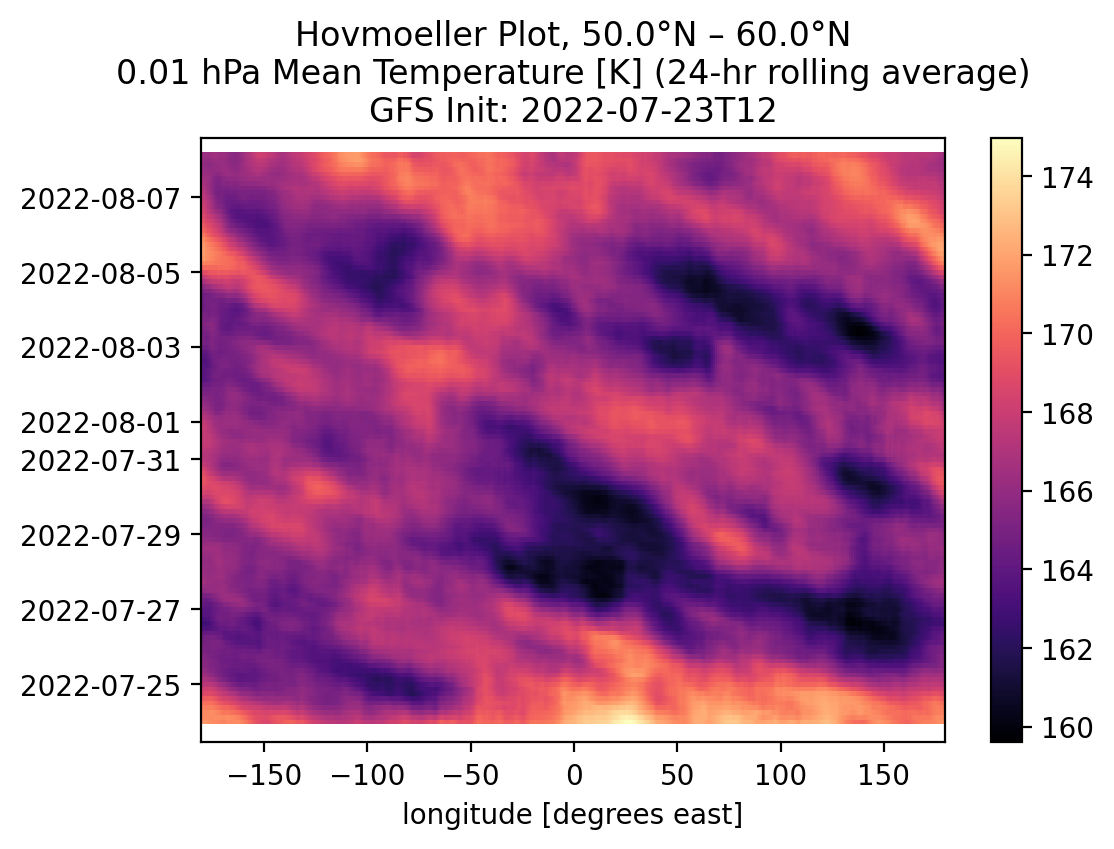

In [ ]:
!pip install netCDF4==1.5.8

import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from string import Template

plt.rcParams['figure.dpi'] = 200

def lat_hemisphere(lat):
    return 'N' if lat >= 0. else 'S'

GFS_DODS_1P00 = Template('https://nomads.ncep.noaa.gov/dods/gfs_1p00/gfs${date}/gfs_1p00_${run}z')

LEVEL = 0.01

url = GFS_DODS_1P00.substitute(date=date, run=run)
ds_online = xr.open_dataset(url)

ds = ds_online[['tmpprs']].sel(lev=LEVEL).load()

ds.coords['lon'] = (ds.coords['lon'] + 180) % 360 - 180
ds = ds.sortby(ds['lon'])

ds['tmpprs'] \
    .sel(lat=slice(lat_min, lat_max)) \
    .mean(dim='lat') \
    .rolling(time=8, center=True) \
    .mean() \
    .plot(
        cmap='magma', cbar_kwargs={'label': None},
    )

plt.xlabel('longitude [degrees east]')
plt.ylabel(None)

gfs_init = ds['time'][0].values
title = \
    f'Hovmoeller Plot, {lat_min}°{lat_hemisphere(lat_min)} – {lat_max}°{lat_hemisphere(lat_max)}\n' \
    f'{LEVEL} hPa Mean Temperature [K] (24-hr rolling average)\n' \
    f'GFS Init: {np.datetime_as_string(gfs_init, unit="h")}'
plt.title(title)